In [4]:
import yfinance as yf
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

df = yf.Ticker("BBRI.JK")
df = df.history(period="max")
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-05-22 00:00:00+07:00,5300.0,5500.0,5300.0,5425.0,162655900,0.0,0.0
2023-05-23 00:00:00+07:00,5475.0,5600.0,5475.0,5500.0,255251600,0.0,0.0
2023-05-24 00:00:00+07:00,5525.0,5600.0,5450.0,5600.0,187436100,0.0,0.0
2023-05-25 00:00:00+07:00,5500.0,5575.0,5450.0,5475.0,224391900,0.0,0.0
2023-05-26 00:00:00+07:00,5425.0,5600.0,5425.0,5600.0,154003100,0.0,0.0


In [5]:
del df["Dividends"]
del df["Stock Splits"]

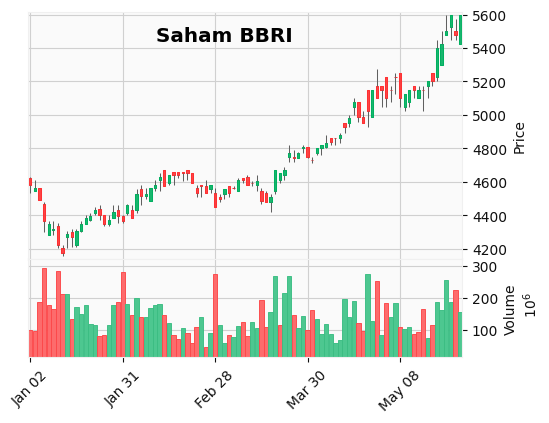

<function matplotlib.pyplot.show(close=None, block=None)>

In [6]:
dfVisual = df.loc["2023-01-01":].copy()

mpf.plot(dfVisual, type='candle', style='yahoo', title='Saham BBRI',
         ylabel='Price', ylabel_lower='Volume', figsize=(5,4),
         volume=True, tight_layout=True)

mpf.show


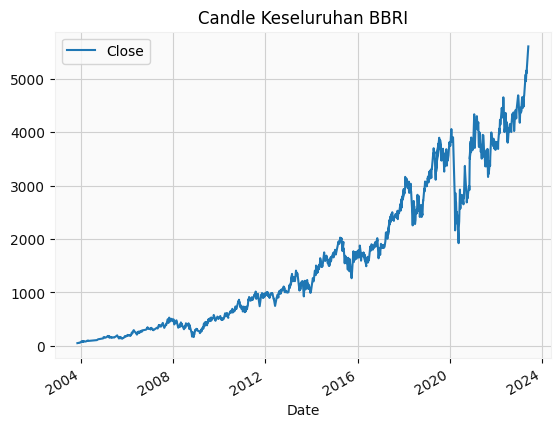

In [7]:
df.plot.line(y="Close", use_index=True)
plt.title("Candle Keseluruhan BBRI")
plt.show()

In [8]:
df = df.loc["2020-01-01":].copy()

In [9]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Memuat data
prices = df['Close'].values.reshape(-1, 1)

In [10]:
# Menormalkan data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Membagi data menjadi data latih dan data uji
train_size = int(len(scaled_prices) * 0.8)
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]

In [11]:
# Membuat dataset latih dan uji
def create_dataset(data, lookback):
    X, Y = [], []
    for i in range(len(data) - lookback):
      X.append(data[i:i+lookback])
      Y.append(data[i+lookback])
    return np.array(X), np.array(Y)

lookback = 10 # temporary
train_X, train_Y = create_dataset(train_data, lookback)
test_X, test_Y = create_dataset(test_data, lookback)


In [12]:
# Membangun model RNN
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=32, input_shape=(lookback, 1)),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# train model
model.fit(train_X, train_Y, epochs=50, batch_size=32)

Epoch 1/50
21/21 [==============================] - 1s 3ms/step - loss: 0.0086
Epoch 2/50
21/21 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 3/50
21/21 [==============================] - 0s 3ms/step - loss: 8.5537e-04
Epoch 4/50
21/21 [==============================] - 0s 3ms/step - loss: 7.7213e-04
Epoch 5/50
21/21 [==============================] - 0s 3ms/step - loss: 7.4987e-04
Epoch 6/50
21/21 [==============================] - 0s 3ms/step - loss: 7.3612e-04
Epoch 7/50
21/21 [==============================] - 0s 3ms/step - loss: 7.0717e-04
Epoch 8/50
21/21 [==============================] - 0s 3ms/step - loss: 6.8487e-04
Epoch 9/50
21/21 [==============================] - 0s 3ms/step - loss: 6.7361e-04
Epoch 10/50
21/21 [==============================] - 0s 3ms/step - loss: 6.6025e-04
Epoch 11/50
21/21 [==============================] - 0s 3ms/step - loss: 6.4894e-04
Epoch 12/50
21/21 [==============================] - 0s 3ms/step - loss: 6.3450e-04
Epoch 13/

In [13]:
# Melakukan prediksi
train_preds = model.predict(train_X)
test_preds = model.predict(test_X)

# Menormalkan kembali data
train_preds = scaler.inverse_transform(train_preds)
train_Y = scaler.inverse_transform(train_Y)
test_preds = scaler.inverse_transform(test_preds)
test_Y = scaler.inverse_transform(test_Y)

5/5 [==============================] - 0s 3ms/step


In [14]:
# Menghitung metrik evaluasi
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test_Y, test_preds)
mae = mean_absolute_error(test_Y, test_preds)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 14391.125762196687
Mean Absolute Error (MAE): 97.35343111478366


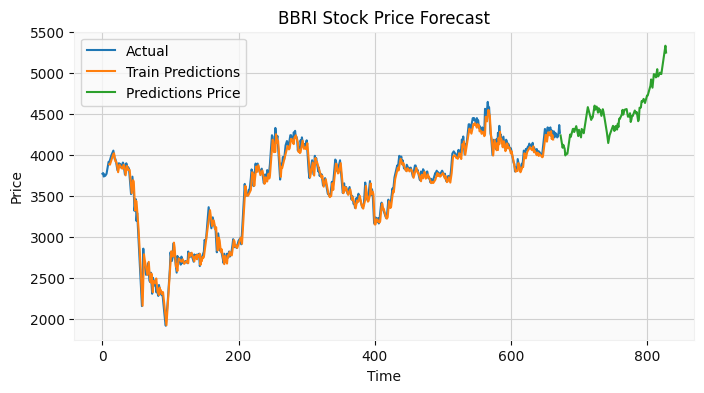

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(prices[:train_size + lookback], label='Actual')
plt.plot(range(lookback, train_size), train_preds, label='Train Predictions')
plt.plot(range(train_size + lookback, len(prices)), test_preds, label='Predictions Price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("BBRI Stock Price Forecast")
plt.legend()
plt.show()

In [16]:
# Mengambil periode yang sesuai untuk Test Predictions dan Actual
test_actual = prices[train_size + lookback:]

# Membuat DataFrame untuk perbandingan
comparison_df = pd.DataFrame({'Harga Sebenarnya': test_actual.flatten(),
                              'Harga Prediksi': test_preds.flatten()})

comparison_df


,Harga Sebenarnya,Harga Prediksi
0,4243.817871,4240.314941
1,4177.949707,4200.710449
2,4112.081055,4140.798828
3,4168.539551,4089.463379
4,4140.310547,4125.781250
...,...,...
151,5425.000000,5184.404297
152,5500.000000,5215.636230
153,5600.000000,5269.192383
154,5475.000000,5332.518066
